In [1]:
%pylab inline
import scipy, scipy.stats
pylab.rcParams['figure.figsize'] = (8.0, 4.0)
# from IPython.html.widgets import interact, fixed
# import ipywidgets
from __future__ import print_function

Populating the interactive namespace from numpy and matplotlib


## 2.6. Nonparametric Correlation

Basic Idea: 
* Instead of using the values $x_i$
* use the rank place $r_i$ of $x_i$ 
* in a sorted series $x_{r_1} \le x_{r_2}\le \ldots \le x_{r_N}$

** Example **

| i	| 	x 	|	y	|	r	|	s  |
|---|:------|:------|:------|:-----|
|1	|	3.1	|	2.2	|	3	|	2  |
|2	|	1.1	|	1.2	|	1	| 	1  |
|3	|	2	|	3	|	2	|	4  |
|4	|	4.5	|	4	|	5	|	5  |
|5	|	4	|	2.5	|	4	|	3  |

[2 1 5 3 4]


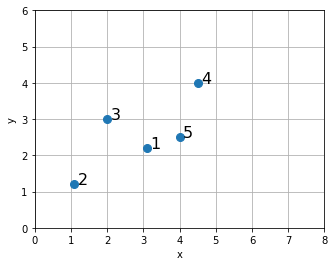

In [2]:
x = array([[3.1, 2.2], [1.1,1.2], [2,3], [4.5,4], [4,2.5]])
plot(x[:,0], x[:,1], "o", markersize=8)
[text(el[0]+0.1,el[1], "%s" %(i+1), fontsize=16) for i, el in enumerate(x)]
axis([0,8,0,6]); xlabel("x"); ylabel("y"); grid(True); gca().set_aspect('equal')
x[:,1]
ios = x[:,1].argsort() # this is not s[i]. This is i[s]!!!
print(ios+1)

$\bar{r} = \bar{s} = 3, r_{sp} = \frac{0+4+(-1)+4}{10}= \frac{7}{10}$

** Motivation: **

* more generally applicable
* robustness: more robust against measurement errors
* better statistical interpretation

What do we do if $x_i=x_j$?
* these are called 'ties'
* jitter $x_i, x_j$, i.e. add a small random number
* this results in different rankings $k$ and $k+1$.
* assign to both data points the mean rank $k+1/2$
* apply the analogue procedure for $q>2$ equal values.

Ranks offer better statistical means of interpretation, because the distribution of ranks is better specified: typically it is a uniform distribution from 1 to $N$.

### 2.6.2. Spearman's Rank Correlation Coefficient 

Let $\{r_i\},\{s_i\}$ be the ranks of $\{x_i\},\{y_i\}, i=1,\dots, N$.
Then the Spearman Rank Correlation Coefficient is defined as  
$$	r_{\text{SP}} = \frac{\sum\limits_i (r_i-\bar{r})(s_i - \bar{s})}
		{\sqrt{\sum\limits_i (r_i - \bar{r})^2}\cdot \sqrt{\sum\limits_i (s_i - \bar{s})^2}}$$
* note the similiarity to the definition of the linear correlation coefficient $r$ 

** Statistical Test:** 
* The null hypothesis $H_0$: $x$ and $y$ are linearly uncorrelated
* Statistic:
$$	t=r_{\text{SP}}\sqrt{\frac{N-2}{1-r_{\text{SP}}^2}} $$
* Distribution of $t$ under valid $H_0$ = Student-$t$ distribution with $\nu=N-2$ degrees of freedom
* This is independent of the actual distributions of $x$ and $y$

** Alternative Correlation Measures **

$$ 	D=\sum\limits_{i=1}^N (r_i - s_i)^2 $$
* Sum of the squared rank deviations
* is 0, if the rank places are equally sorted in both features

If there are no ties, the following connection with $r_{\text{\tiny SP}}$ can be found:
$$	r_{SP}= 1 - \frac{6D}{N^3-N} $$

There is no direct test for $D$: assuming true $H_0$, $D$ is approximately normally distributed 
* with mean $\bar{D} \approx \frac{1}{6}(N^3-N)$ 
* and variance $\displaystyle\text{Var}(D) \approx \frac{(N-1)N^2(N+1)^2}{36}$

* different than in previous tests here the statistics can also be smaller than a critical level for the null hypothesis to be rejectable.
* if a $D_{crit}$ is surpassed, the features $x$ and $y$ are anticorrelated, i.e. $x$ increases while $y$ decreases.

<img src="images/NonParametricKorr-D-Test.png" width="40%">

### 2.6.3. Kendall's $\tau$

Instead of using ranks, here we have an even more coarse reduction:
* higher rank
* equal rank
* lower rank

The advantage is, that no sorting is required
* since ranks are monotonous with feature values, $r_i < r_j$ is identical to $x_i < x_j$.

Point of departure:
* $N$ data points (paired features) $(x_i, y_i)$

<img src="images/Kendall-tau-Diagram.png" width="50%">

Regard all $\frac{1}{2}N(N-1)$ pairs $(i,j)$ and count the following for quantities:

| name | definition | meaning |
|:----------|:-----------------------------------------------|:-------------------|
|**con**cordant		| nr. of pairs with $(x_i-x_j)(y_i-y_j) >0$      | positive slope     |
|**dis**cordant		| nr. of pairs with $(x_i-x_j)(y_i-y_j) <0$      | negative slope     |
|extra-x	| nr. of pairs with $x_i\not=x_j \wedge y_i=y_j$ | horizontal         |
|extra-y	| nr. of pairs with $x_i=x_j \wedge y_i\not=y_j$ | vertical           |

** Statistical Test:** 
* Null hypothesis $H_0$: $x$ and $y$ are uncorrelated
* Statistics:

$$	\tau= \frac{\text{con} - \text{dis}}
		{\sqrt{\text{con + dis + extra-y}} \cdot \sqrt{\text{con + dis + extra-x}}} 
$$
* Note that $-1 \leq \tau \leq 1$ and

 * $\tau =1$  $\Leftrightarrow$   only con $>0$  $\Leftrightarrow$ $x,y$ have same order 
 * $\tau =-1$  $\Leftrightarrow$   only dis $>0$  $\Leftrightarrow$ $x,y$ have opposite order 

* ** Remark:** 
 * double points (i.e. exactly identical coordinates) affect the counters nonetheless, so they cannot just be eliminated
 * as pair they count neither for extra-x nor extra-y.
* Distribution of $\tau$ under true $H_0$:
$$ \tau \sim N \left( \mu = 0, \sigma^2 = \frac{4N+10}{9N(N+1)} \right)$$
* Note that $N(\mu, \sigma^2) =$ Normal distribution with mean $\mu$ and variance $\sigma^2$
* The method is particularly suitable if there are very few alternative values. In this case 
$ r_{\text{SP}}$ would be dominated by mean ranks.
* Complexity: $o(N^2)$ while $r_{\text{SP}}$ scales with $o(N \log(N))$
 * so could be problematic with large data sets